- Convert HydroBASIN polygons from SHP to KML
- Fix geometry errors 
- Simplify geometry (optionally)

In [46]:
%matplotlib inline

import logging
import sys
import os
import glob

import math
import ogr
import shapely.geometry, shapely.wkt
import pylab
import matplotlib.pyplot as plt
from utils.shapely_plot import draw
import shapely as sl
import fiona
import numpy as np

pylab.rcParams['figure.figsize'] = (17.0, 15.0)
logging.basicConfig(stream=sys.stderr, level=logging.INFO)


In [329]:
def convert(input_path):
    output_path = os.path.splitext(input_path)[0] + '.kml'

    filename = os.path.splitext(os.path.basename(input_path))[0]

    dst_ds = ogr.GetDriverByName('KML').CreateDataSource(output_path)
    dst_lyr = dst_ds.CreateLayer(filename)

    # create fields using OGR
    src_ds = ogr.Open(input_path)
    src_lyr = src_ds.GetLayerByIndex(0)
    f = src_lyr.GetFeature(0)
    [dst_lyr.CreateField(f.GetFieldDefnRef(i)) for i in range(f.GetFieldCount())]

    for feat in src_lyr:
        try:
            geom = shapely.wkt.loads(feat.GetGeometryRef().ExportToWkt())
        except Exception as e: 
            print('Error({0}), skipping geometry.'.format(e))
            continue

        # uncomment in case of messed-up geometry
        #
        if not geom.is_valid:
            geom = geom.buffer(0.0)

        # geom = geom.simplify(0.004)

        f = ogr.Feature(dst_lyr.GetLayerDefn())

        # set field values
        for i in range(feat.GetFieldCount()):
            fd = feat.GetFieldDefnRef(i)
            f.SetField(fd.GetName(), feat.GetField(fd.GetName()))

        # set geometry    
        f.SetGeometry(ogr.CreateGeometryFromWkt(geom.to_wkt()))
        
        # create feature
        dst_lyr.CreateFeature(f)
        
        f.Destroy() 
        
    src_ds.Destroy()

    dst_ds.Destroy()

# files = glob.glob(r'D:\gis\HydroBASINS\without_lakes\hybas_sa_lev*_v1c.shp')
# files = glob.glob(r'D:\gis\HydroBASINS\without_lakes\simplified\hybas_au_lev08_v1c.shp')

# files = glob.glob(r'D:\gis\GRanD\GRanD_dams_v1_1.shp')
files = glob.glob(r'D:\gis\GRanD\GRanD_reservoirs_v1_1.shp')

# files = glob.glob(r'D:\gis\HydroBASINS\rivers\*_riv_15s.shp')
# files = [r'D:\gis\OpenStreetMaps\Asia\Australia\rivers_lines.shp',
#          r'D:\gis\OpenStreetMaps\Asia\Australia\rivers_multipolygons.shp']

# files = [r'D:\gis\OpenStreetMaps\simplified-land-polygons-complete-3857\simplified_land_polygons.shp']
    
# convert(r'D:\src\GitHub\data-utils\notebooks\shapefile.shp')

# convert(r'D:\gis\HydroBASINS\without_lakes\hybas_au_lev07_v1c.shp')

for f in files:
    convert(f)


ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring


Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring



Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.
Error(Could not create geometry because of errors while reading input.), skipping geometry.

In [ ]:
import fiona

c = fiona.collection(files[0], "r")
print(c.schema)

type_map = { 'float' : ogr.OFTReal, 'int' : ogr.OFTInteger }

fields = c.schema['properties']
for p in fields:
    print p + ' ' + fields[p]

C:\Anaconda\lib\site-packages\numba\dataflow.py:52: RuntimeWarning: inconsistent stack offset for block(offset:326, outgoing: [], incoming: [21, 61, 110, 323])
  RuntimeWarning)


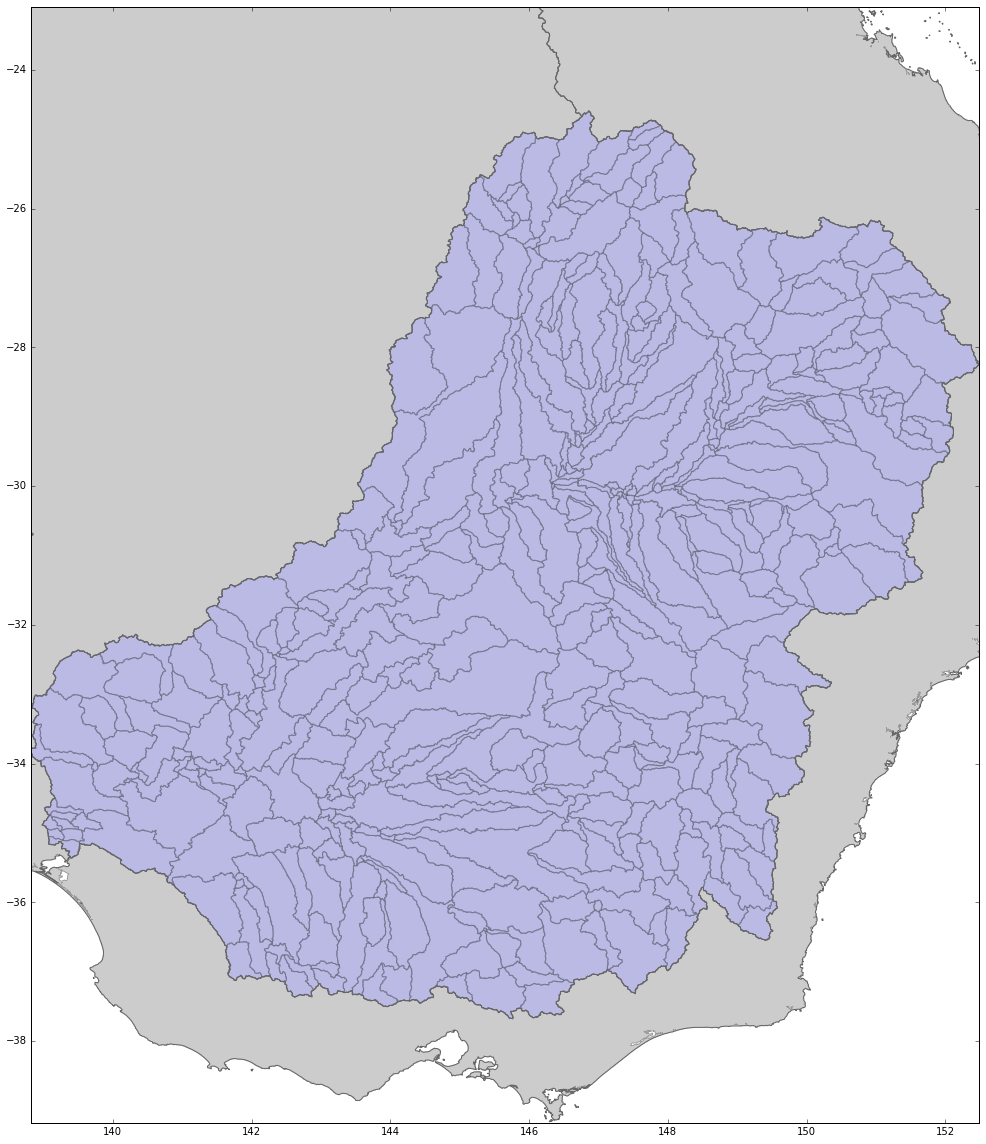

In [3]:
# Select sub-basins that fall within a larger basin and then group them by using a regular grid

# Amazon
# main_basin_shp = 'D:\gis\HydroBASINS\without_lakes\hybas_sa_lev02_v1c.shp'
# main_basin_id = 6020006540
# sub_basin_shp = 'D:\gis\HydroBASINS\without_lakes\hybas_sa_lev06_v1c.shp'

# Murray & Darling
main_basin_shp = 'D:\gis\HydroBASINS\without_lakes\hybas_au_lev03_v1c.shp'
main_basin_id = 5030073410
sub_basin_shp = 'D:\gis\HydroBASINS\without_lakes\hybas_au_lev07_v1c.shp'

pylab.rcParams['figure.figsize'] = (17.0, 20.0)

fig = plt.figure()
axes = plt.axes()
axes.set_aspect('equal', 'datalim')

main_basin_geom = None

with fiona.collection(main_basin_shp, "r") as input:
    for f in input:
        geom = sl.geometry.shape(f['geometry'])

        id = f['properties']['HYBAS_ID']
        if id == main_basin_id:
            main_basin_geom = geom
        draw(geom)

bounds = main_basin_geom.bounds
axes.set_xlim(bounds[0], bounds[2])
axes.set_ylim(bounds[1], bounds[3])
                                
with fiona.collection(sub_basin_shp, "r") as input:
    for f in input:
        geom = sl.geometry.shape(f['geometry'])

        if main_basin_geom.contains(geom):
            draw(geom, fill='#aaaaff', alpha=0.5)
        else:
            pass
            # draw(geom, fill='#ffffff', lw=0.1)

plt.show()  


In [7]:
def get_basin(id, path):
    with fiona.collection(path, "r") as input:
        for f in input:
            id = f['properties']['HYBAS_ID']
            if id == main_basin_id:
                return f
    return None

def get_child_basins(parent_pfaf_id, child_basins_path):
    with fiona.collection(child_basins_path, "r") as input:
        for feature in input:
            pfaf_id = feature['properties']['PFAF_ID'] 
            if str(pfaf_id).startswith(str(parent_pfaf_id)): 
                yield feature

# Amazon
# files = glob.glob(r'D:\gis\HydroBASINS\without_lakes\hybas_sa_lev*_v1c.shp')[1:]
# main_basin_id = 6020006540
# start = 0

files = glob.glob(r'D:\gis\HydroBASINS\without_lakes\hybas_au_lev*_v1c.shp')[1:]
main_basin_id = 5030073410
start = 2

main_basin = get_basin(main_basin_id, files[start])

pfaf_id = str(main_basin['properties']['PFAF_ID'])
main_basin_geom = sl.geometry.shape(main_basin['geometry'])

print('Main basin: ' + files[0])
print('Area: ' + str(main_basin_geom.area))

total_count = 0

def get_children(main_basin_id, child_basins_path):
    print('Child basins: ' + child_basins_path)
    child_basins = list(get_child_basins(main_basin_id, child_basins_path))
    child_basins_ids = [str(f['properties']['PFAF_ID']) for f in child_basins]
    child_basins_geoms = [sl.geometry.shape(f['geometry']) for f in child_basins]
    count = len(child_basins)
    global total_count
    total_count += count
    print(count)
    
    return (child_basins, child_basins_ids, child_basins_geoms)

basins3, ids3, geoms3 = get_children(pfaf_id, files[start + 1])
basins4, ids4, geoms4 = get_children(pfaf_id, files[start + 2])
basins5, ids5, geoms5 = get_children(pfaf_id, files[start + 3])
basins6, ids6, geoms6 = get_children(pfaf_id, files[start + 4])
basins7, ids7, geoms7 = get_children(pfaf_id, files[start + 5])
basins8, ids8, geoms8 = get_children(pfaf_id, files[start + 6])

basins_per_level = [basins3, basins4, basins5, basins6, basins7, basins8]

print('Total basins: ' + str(total_count))

Main basin: D:\gis\HydroBASINS\without_lakes\hybas_au_lev01_v1c.shp
Area: 100.489618539
Child basins: D:\gis\HydroBASINS\without_lakes\hybas_au_lev04_v1c.shp
10
Child basins: D:\gis\HydroBASINS\without_lakes\hybas_au_lev05_v1c.shp
27
Child basins: D:\gis\HydroBASINS\without_lakes\hybas_au_lev06_v1c.shp
137
Child basins: D:\gis\HydroBASINS\without_lakes\hybas_au_lev07_v1c.shp
434
Child basins: D:\gis\HydroBASINS\without_lakes\hybas_au_lev08_v1c.shp
1439
Child basins: D:\gis\HydroBASINS\without_lakes\hybas_au_lev09_v1c.shp
3809
Total basins: 5856


Put all catchments into a graph

In [8]:
import networkx as nx
n = nx.DiGraph()

ids = [pfaf_id]+ids3+ids4+ids5+ids6+ids7
areas = [g.area for g in [main_basin_geom]+geoms3+geoms4+geoms5+geoms6+geoms7]
basins = [b for b in [main_basin]+basins3+basins4+basins5+basins6+basins7]

n.add_nodes_from([(i,{'area':a, 'feature':f}) for (i,a,f) in zip(ids, areas, basins)])
# n.add_nodes_from([(i,{'area':a}) for (i,a,f) in zip(ids, areas, basins)])

n.add_edges_from([(pfaf_id, i) for i in ids3])
n.add_edges_from([(i[:-1], i) for i in ids4])
n.add_edges_from([(i[:-1], i) for i in ids5])
n.add_edges_from([(i[:-1], i) for i in ids6])
n.add_edges_from([(i[:-1], i) for i in ids7])

# max_level = 6
# n = n.subgraph([kv[0] for kv in list(n.degree().iteritems()) if len(kv[0]) < max_level + 2])

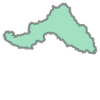

In [9]:
nodes=dict(n.nodes(data=True))

shape=sl.geometry.shape(nodes['5643001']['feature']['geometry'])
shape

In [10]:
def get_wh(geom):
    bounds = geom.bounds

    w = bounds[2]-bounds[0]
    h = bounds[3]-bounds[1]
    
    return (w, h) 
    
(w, h) = get_wh(shape)

print('w', w)
print('h', h)

('w', 2.4458333333333258)
('h', 1.3172339545355882)


In [11]:
def geometry_larger_than(geom, w, h):
    bounds = geom.bounds
    gw = bounds[2]-bounds[0]
    gh = bounds[3]-bounds[1]
    return (gw > w) or (gh > h)

def geometry_smaller_than(geom, w, h):
    bounds = geom.bounds
    gw = bounds[2]-bounds[0]
    gh = bounds[3]-bounds[1]
    return (gw < w) and (gh < h)

def get_leaves_smaller_than(node, w, h):
    for child_node in n.successors(node):
        geom = sl.geometry.shape(nodes[child_node]['feature']['geometry'])
        
        last = len(n.successors(child_node)) == 0
    
        if(geometry_smaller_than(geom, w, h) or last):
            yield child_node
        else:
            for child_child_node in get_leaves_smaller_than(child_node, w, h):
                yield child_child_node


In [65]:
max_w = 2.0
max_h = 2.0

In [66]:
leaves = list(get_leaves_smaller_than('564', max_w, max_h))
print(len(leaves))
s = n.subgraph(leaves)

469


In [53]:
basins_wh = []
basins_wh_min = []
basins_wh_max = []
basins_count = []


for basins in basins_per_level:
    whs = [get_wh(sl.geometry.shape(basin['geometry'])) for basin in basins]
    max_wh = np.max([max(whi) for whi in whs])
    min_wh = np.min([min(whi) for whi in whs])
    count = len(basins)
    wh = 0.5*(max_wh+min_wh)
    basins_wh_min.append(min_wh)
    basins_wh_max.append(max_wh)
    basins_wh.append(wh)
    basins_count.append(count)
    print(min_wh, wh, max_wh, count)

(1.4041666666666401, 5.3000028822156935, 9.1958390977647468, 10)
(0.021097988552526203, 3.0334685431586337, 6.0458390977647412, 27)
(0.021097988552526203, 2.4917989942762677, 4.9625000000000092, 137)
(0.0041666666666628771, 1.7315336439344549, 3.4589006212022468, 434)
(0.0041666666666628771, 1.1895833333333314, 2.375, 1439)
(0.0041666666666628771, 0.75236697726779944, 1.500567287868936, 3809)


In [59]:
# show number of catchments per level + maximum Width / Height
min_wh_values = []
max_wh_values = []
wh_values = []
average_wh_values = []
catchment_count = []
for i in np.arange(0.2, 9.0, 0.2):
    selection = list(get_leaves_smaller_than('564', i, i))
    
    wh = [get_wh(sl.geometry.shape(nodes[basin]['feature']['geometry'])) for basin in selection]
    max_wh = np.max([max(whi) for whi in wh])
    min_wh = np.min([min(whi) for whi in wh])
    average_wh_values.append(0.5*(min_wh+max_wh))
    count = len(basins)

    count = len(selection)
    print(min_wh, i, max_wh, count)
    catchment_count.append(count)
    max_wh_values.append(max_wh)
    min_wh_values.append(min_wh)
    
    wh_values.append(i)

(0.0041666666666628771, 0.20000000000000001, 2.375, 1439)
(0.0041666666666628771, 0.40000000000000002, 2.375, 1439)
(0.0041666666666628771, 0.60000000000000009, 2.375, 1439)
(0.0041666666666628771, 0.80000000000000004, 2.375, 1402)
(0.0041666666666628771, 1.0, 2.375, 1180)
(0.0041666666666628771, 1.2, 2.375, 1013)
(0.0041666666666628771, 1.4000000000000001, 2.375, 796)
(0.0041666666666628771, 1.6000000000000001, 2.375, 672)
(0.0041666666666628771, 1.8, 2.375, 546)
(0.0041666666666628771, 2.0, 2.375, 469)
(0.0041666666666628771, 2.2000000000000002, 2.375, 411)
(0.0041666666666628771, 2.4000000000000004, 2.375, 346)
(0.0041666666666628771, 2.6000000000000005, 2.5256442599826414, 305)
(0.0041666666666628771, 2.8000000000000003, 2.7203645494249145, 272)
(0.0041666666666628771, 3.0000000000000004, 2.9875000000000114, 222)
(0.0041666666666628771, 3.2000000000000002, 3.1883319430881158, 173)
(0.0041666666666628771, 3.4000000000000004, 3.2166666666666757, 165)
(0.0041666666666628771, 3.6000000

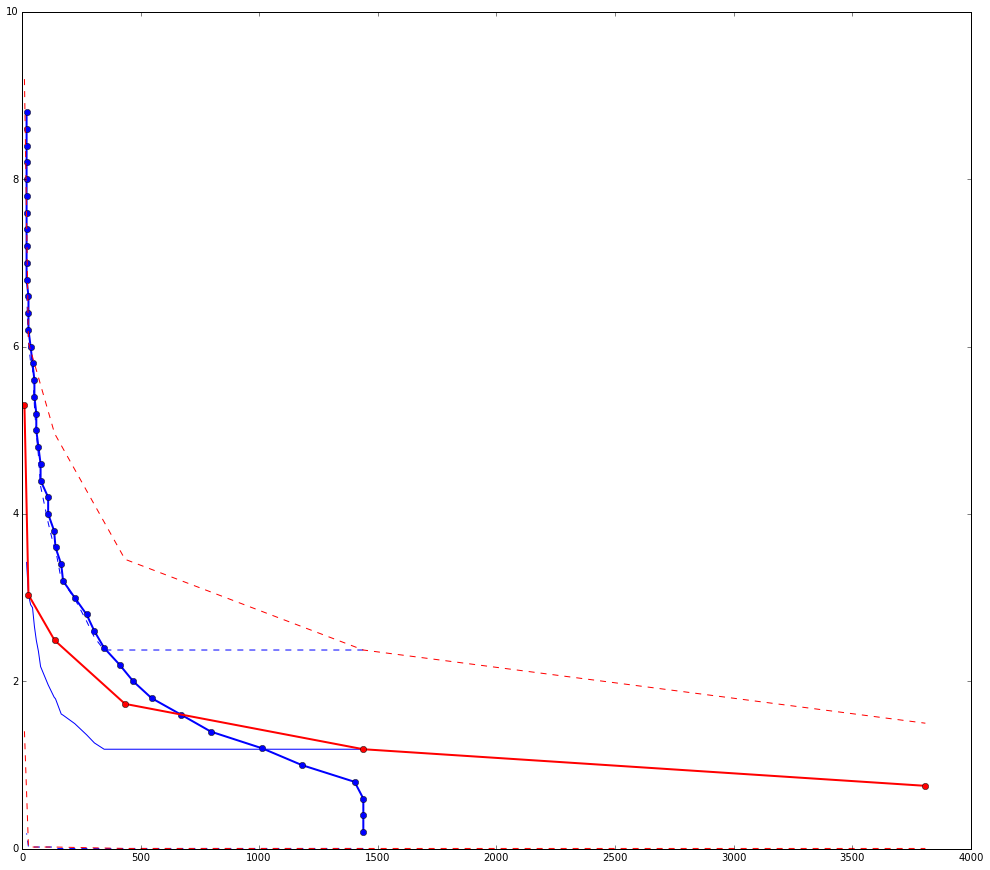

In [60]:
plt.plot(catchment_count, wh_values, 'ob-', linewidth=2.0)
plt.plot(catchment_count, average_wh_values, 'b-')
plt.plot(catchment_count, min_wh_values, 'b--')
plt.plot(catchment_count, max_wh_values, 'b--')


# plt.errorbar(wh_values, catchment_count,xerr=[min_error_wh_values, max_error_wh_values], fmt='.')


# plt.errorbar(wh_values, catchment_count, xerr=error_wh_values)

plt.plot(basins_count, basins_wh, 'or-', linewidth=2.0)
plt.plot(basins_count, basins_wh_min, 'r--')
plt.plot(basins_count, basins_wh_max, 'r--')

# plt.errorbar(basins_wh, basins_count, xerr=[basins_wh_error_min,basins_wh_error_max])


In [198]:
large_nodes = list((node for (node, data) in n.nodes(data=True) 
                    if geometry_larger_than(sl.geometry.shape(data['feature']['geometry']), max_w, max_h)))
s = n.subgraph(large_nodes)
print(len(large_nodes))
leaves=[node for node,data in s.out_degree().items() if data==0]
print(len(list(leaves)))
s = n.subgraph(leaves)


136


'5640017'

Try to open it in http://visjs.org/examples/network/15_dot_language_playground.html

In [14]:
nx.write_dot(n, r"..\output\catchment_pfafids.dot")
print(len(n.nodes()))

2048


In [69]:
pos = nx.spring_layout(nx.Graph(n), iterations=500)

C:\Anaconda\lib\site-packages\matplotlib\collections.py:764: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


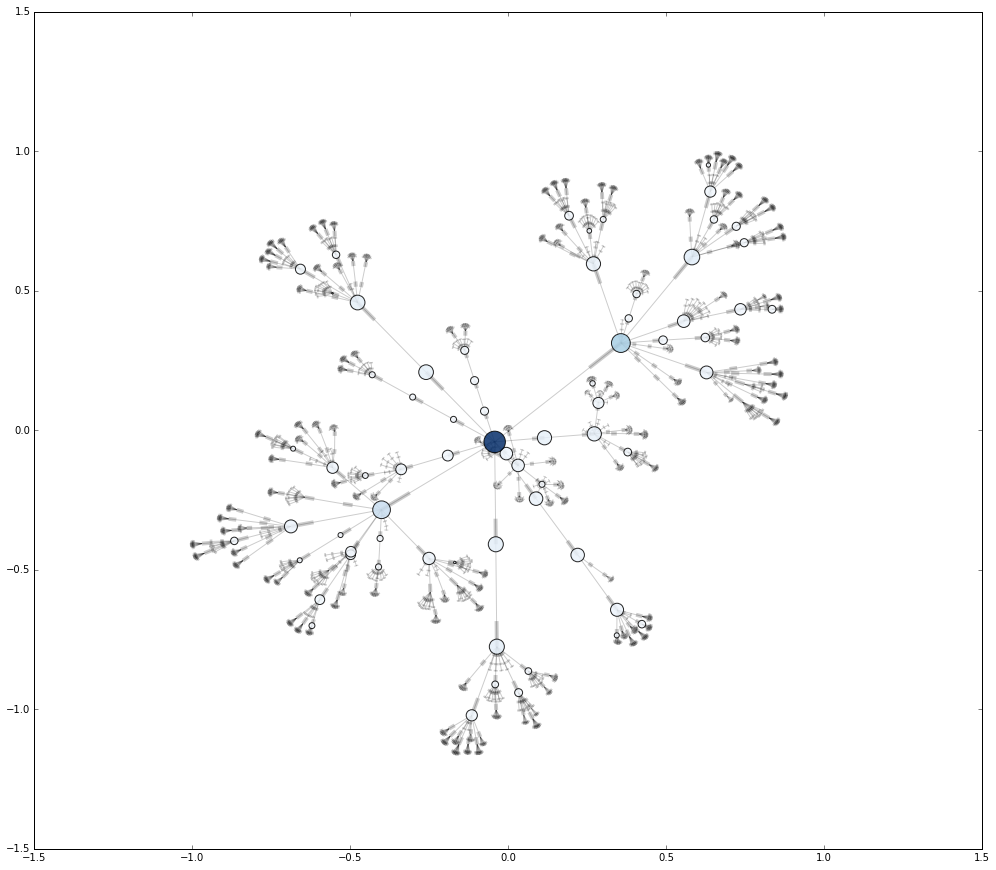

In [70]:
import math

node_areas=[data['area'] for node,data in n.nodes(data=True)]

node_sizes=[math.log(a)*100 for a in node_areas]

nx.draw_networkx_nodes(n, pos, node_color=node_areas, node_size=node_sizes, cmap=plt.cm.Blues, alpha=0.85)
_ = nx.draw_networkx_edges(n, pos, alpha=0.2)
# _ = nx.draw_networkx_labels(n, pos, font_size=15)

# nx.draw_networkx_nodes(s, pos, node_size=20, cmap=plt.cm.Reds, alpha=0.85)


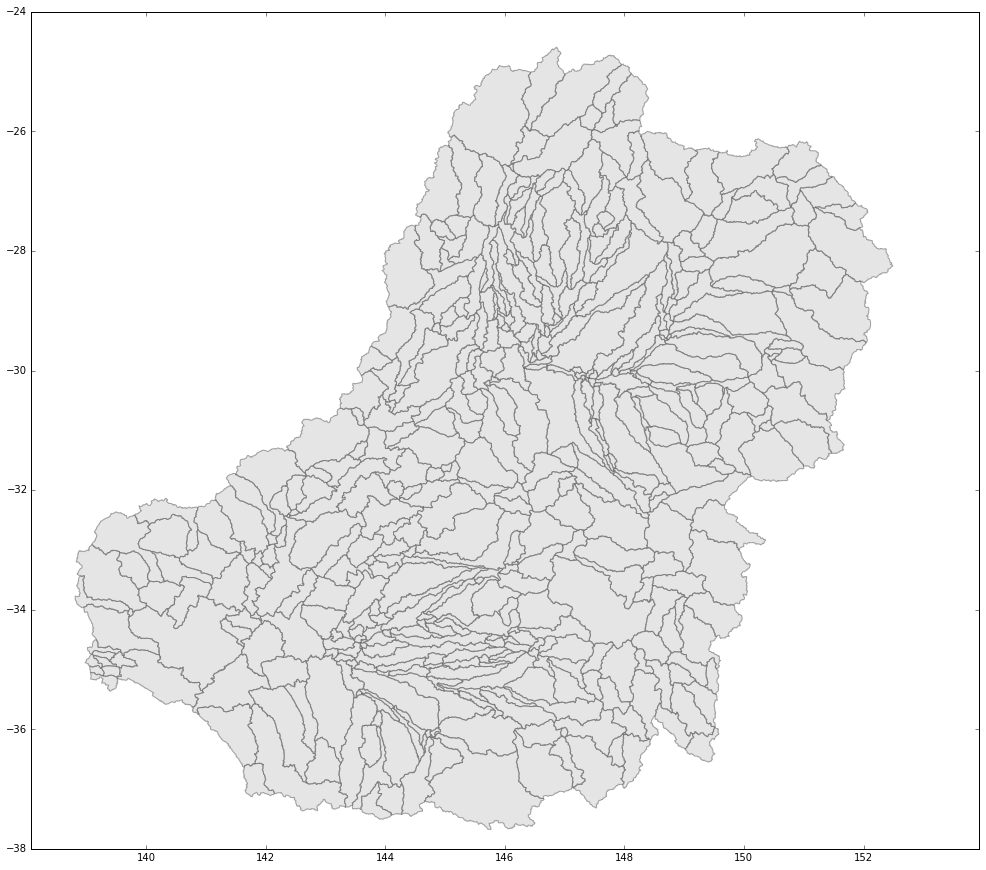

In [335]:
leaf_basins = list(s.nodes(data=True))

fig = plt.figure()
axes = plt.axes()
axes.set_aspect('equal', 'datalim')

for f in leaf_basins:
    geom = sl.geometry.shape(f[1]['feature']['geometry'])
    draw(geom, alpha=0.5)

plt.show()  


In [67]:
# write as a selection shp file

with fiona.open(files[2]) as source:
    source_driver = source.driver
    source_crs = source.crs
    source_schema = source.schema

# strange bug? values are not written unless we add .1
source_schema['properties']['HYBAS_ID'] = 'float:11.1'
source_schema['properties']['NEXT_DOWN'] = 'float:11.1'
source_schema['properties']['NEXT_SINK'] = 'float:11.1'
source_schema['properties']['MAIN_BAS'] = 'float:11.1'
print(source_schema)
    
with fiona.open('../output/small_basin_selection.shp', 'w', driver=source_driver, crs=source_crs, schema=source_schema) as c:
    for node in s.nodes(data=True):
        feature = node[1]['feature']
        c.write(feature)

{'geometry': 'Polygon', 'properties': OrderedDict([(u'HYBAS_ID', 'float:11.1'), (u'NEXT_DOWN', 'float:11.1'), (u'NEXT_SINK', 'float:11.1'), (u'MAIN_BAS', 'float:11.1'), (u'DIST_SINK', 'float:10.1'), (u'DIST_MAIN', 'float:10.1'), (u'SUB_AREA', 'float:10.1'), (u'UP_AREA', 'float:10.1'), (u'PFAF_ID', 'int:8'), (u'ENDO', 'int:6'), (u'COAST', 'int:6'), (u'ORDER', 'int:6'), (u'SORT', 'float:11')])}


['564']
['56428', '56429', '56420', '56421', '56422', '56423', '56424', '56425', '56426', '56427']


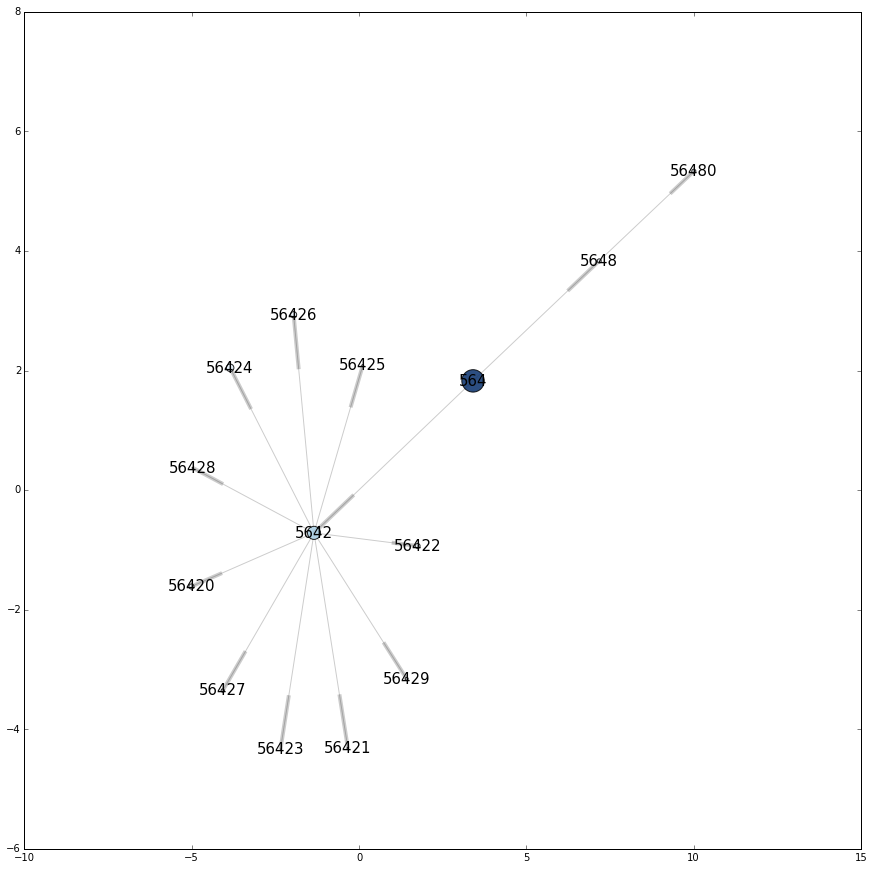

In [21]:
print(n.predecessors('5642'))
print(n.successors('5642'))

s = n.subgraph(n.successors('5642')+['5642','564','56424','5648','56480'])

node_areas=[data['area'] for node,data in s.nodes(data=True)]
node_sizes=[a*5 for a in node_areas]

pos = nx.spring_layout(nx.Graph(s), iterations=500, scale=10.0)

nx.draw_networkx_nodes(s, pos, node_color=node_areas, node_size=node_sizes, cmap=plt.cm.Blues, alpha=0.85)
_ = nx.draw_networkx_edges(s, pos, alpha=0.2)
_ = nx.draw_networkx_labels(s, pos, font_size=15)    

Select basins where Area + Width/Height ratio are just less than a given parameter

In [20]:
def get_catchments_using_area(graph, root, max_area):
    children = graph.successors(root)
    for child in children:
        graph[child]
    
print(n.predecessors('5642'))
print(n.successors('5642'))


['564']
['56428', '56429', '56420', '56421', '56422', '56423', '56424', '56425', '56426', '56427']
